<a href="https://colab.research.google.com/github/RajuSaginala/Personal-Projects-CNN/blob/main/MNIST_Dataset_improved_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Import data

In [88]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [89]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [90]:
pd.set_option('max_columns',None)
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


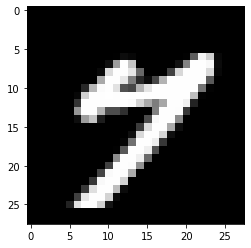

In [85]:
plt.imshow(x_train[1001],cmap='gray')

In [86]:
y_train[1001]

7

4.Data Preprocessing

In [80]:
#standard deviation shld be less
# import numpy as np
# x_train=np.pad(array=x_train,pad_width=((0,0),(2,2),(2,2)))
# x_test=np.pad(array=x_test,pad_width=((0,0),(2,2),(2,2)))

In [87]:
x_train.shape

(60000, 28, 28)

In [77]:
x_train=x_train/255
x_test=x_test/255

In [78]:
x_train.shape

(60000, 36, 36)

In [49]:
from keras import Sequential #create a pipeline.Starting point to build the model
from keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,AveragePooling2D


5.1 Build your architecture

In [51]:
model=Sequential()
model.add(Conv2D(input_shape=(32,32,1),filters=6,kernel_size=(5,5),strides=1,padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=16,kernel_size=(5,5),strides=1,padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=120,kernel_size=(5,5),strides=1,padding='valid',activation='tanh'))

model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(units=84,activation='tanh'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_18 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_19 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_9 (Flatten)         (None, 120)             

5.2 model compile

In [52]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics='accuracy')

6. Model Training

In [53]:
model_training=model.fit(x_train,y=y_train,batch_size=50,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1200/1200 [==============================] - 38s 31ms/step - loss: 0.3316 - accuracy: 0.9011 - val_loss: 0.1308 - val_accuracy: 0.9586
Epoch 2/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1444 - accuracy: 0.9577 - val_loss: 0.0919 - val_accuracy: 0.9708
Epoch 3/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1005 - accuracy: 0.9701 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 4/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 5/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0709 - accuracy: 0.9788 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 6/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0616 - accuracy: 0.9821 - val_loss: 0.0400 - val_accuracy: 0.9878
Epoch 7/15
1200/1200 [==============================] - 36s 30ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0428 -

7. Model Evaluation

In [59]:
model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0341 - accuracy: 0.9898


[0.034090541303157806, 0.989799976348877]

8. Model Prediction

In [72]:
y_pred=model.predict(x_test)
np.argmax(y_pred[5]), y_test[5]

(1, 1)

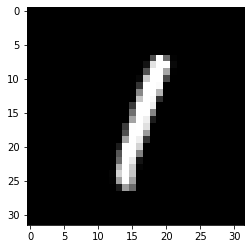

In [73]:
plt.imshow(x_test[5],cmap='gray')

In [91]:
y_test[9997]

4

In [92]:
#argmax to  get the max prob value in above datframe
import numpy as np
np.argmax(y_pred[9997])

4

9. Model performance

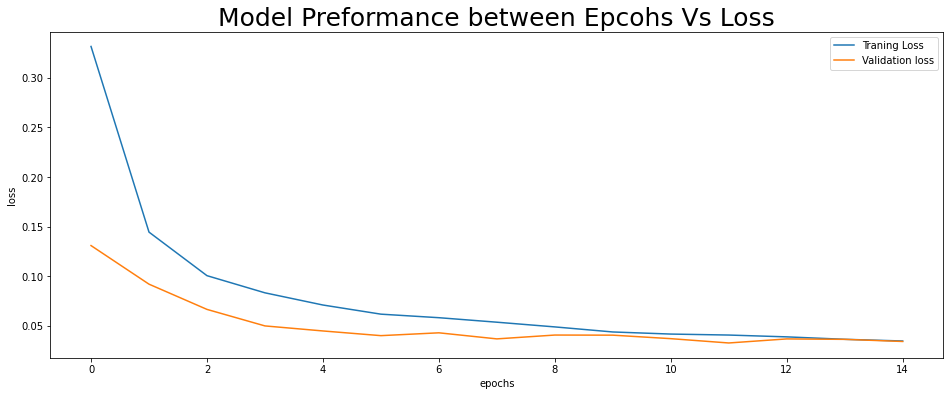

In [93]:
plt.figure(figsize=(16,6))
plt.plot(model_training.history['loss'],label='Traning Loss')
plt.plot(model_training.history['val_loss'],label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model Preformance between Epcohs Vs Loss',size=25)
plt.legend()

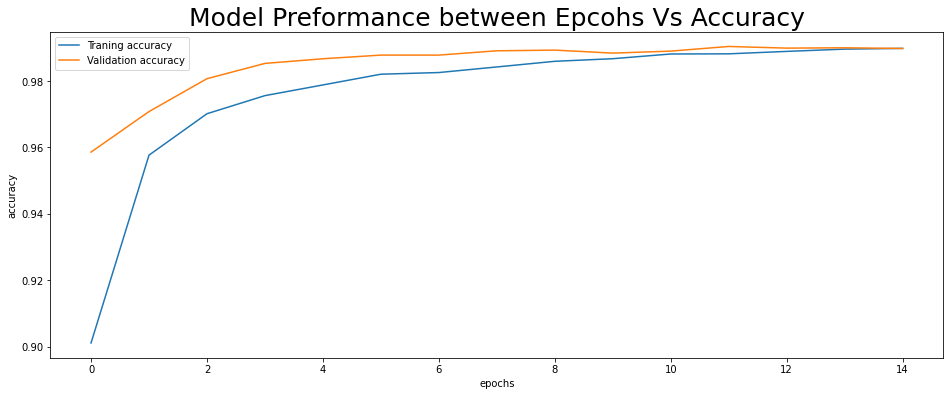

In [96]:
plt.figure(figsize=(16,6))
plt.plot(model_training.history['accuracy'],label='Traning accuracy')
plt.plot(model_training.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Preformance between Epcohs Vs Accuracy',size=25)
plt.legend()

#THE END